### An idea to ensemble inside NNs
#### Why does ensembling worth to talk, what I observed during contest?
##### Note; Don't read it to have good score. This is unaccomplished ideas that I thought due to time limited submisions and seeing people not ensembling because of that.

Jane Street Competition had a time limit on submissions, it should work under 4 mins for 15 thousand rows. Prior to that, I was confused to see single models in public notebooks, since, you know, ensembling is a good thing :D 

I wasn't able to successfully run two Pytorch, and there are some people that ensembles Tensorflow+PyTorch(really don't know what people tried to achieve), Keras+LGBM and others. Number of combinations didn't exceed 2 as I see, due to the time limit. Tree methods were lil bit slower than NNs.

Ensembling XGB+LGB in order to obtain model diversity is OK, might be useful since their *default* tree creation algorithms are different, but probably it would hit to the time limit.

During the contest, at last week probably, one TF+PyTorch ensembling public notebook showed high score in LB, then a lot of people used the notebook and idea with same/different seeds/different CVs and leaderboard then filled with same scores.

People used TFLite in order to train more than one model(since it's, you know, lite) and  ensemble them with fast inference speed. I was using PyTorch, worked little on the contest,tried one idea to ensemble in NNs. 
####  

#### Model Architecture


In [ ]:
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
f = plt.figure(figsize=(18.0,12.0))

img = mpimg.imread('./rnn_hiddenlayer.png') ### Dont think about name, just taken from stackoverflow.
plt.imshow(img)
plt.show()



Better visualisation is at very bottom, thanks to https://github.com/waleedka/hiddenlayer/ .
What I did there? This is just a trick, in order to have fast inference and may better be criticised.
When I saw that a lot of people tries to find a way to ensemble, I just wanted to try ensemble inside a neural network.  

#### Some Functions for data handling, models, etc.
I have functions to train/returning model/ returning dataloaders, SmoothBCE function is not mine. However, nothing fancy there. Reading the text,  looking at the NN graph, for complete  2-3 mins will be sufficient. Functions may be better for practitioners, but there are better notebooks published.

Idea explanation is at the bottom. You can skip the code  part.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import csv
import dask as ddt
import xgboost as xgb
import pandas as pd
import pandas as pd


load_data = True
if load_data:
    train = pd.read_csv('../input/jane-street-market-prediction/train.csv')



features = train.columns[train.columns.str.contains('feature')]
target = 'action'
print("features read")
fillnamean = train.mean()
train = train[train['weight'] != 0]
train['action'] = ((train['weight'].values * train['resp'].values) > 0).astype('int')
train.fillna(train.mean(),inplace=True)
fillnamean  = train.mean()

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=666, test_size=0.2)



In [ ]:
train.head(4)

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss, MSELoss
from torch.nn.modules.loss import _WeightedLoss
import torch.nn.functional as F



all_feat_cols = features
target_cols = "action"
##### Model&Data fnc
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.batch_norm0 = nn.BatchNorm1d(len(all_feat_cols))
        hidden_size = 130
        self.dense0 = nn.Linear(len(all_feat_cols), hidden_size)

        dropout_rate = 0.0
        hidden_sizeLOCAL1 = 65
        hidden_sizeLOCAL2 = 65
        hidden_sizeLOCAL3 = 65
        hidden_sizeLOCAL4 = 65
        hidden_sizeLOCAL5 = 65
        hidden_sizeLOCAL6 = 65
        hidden_sizeLOCAL7 = 65
        hidden_sizeLOCAL8 = 65
        hidden_sizeLOCAL9 = 65
        hidden_sizeLOCAL10 = 65
        hidden_sizeLOCAL11= 65
        hidden_sizeLOCAL12= 65
        hidden_sizeLOCAL13= 65
        hidden_sizeLOCAL14= 65
        hidden_sizeLOCAL15= 65

        
        
        allhiddens  = hidden_sizeLOCAL1 +hidden_sizeLOCAL2 + hidden_sizeLOCAL3 + hidden_sizeLOCAL4 +   hidden_sizeLOCAL5+ hidden_sizeLOCAL6+ hidden_sizeLOCAL7+ hidden_sizeLOCAL8+hidden_sizeLOCAL9+hidden_sizeLOCAL10
        self.dense1 = nn.Linear(hidden_size, hidden_sizeLOCAL1)
        self.batch_norm1 = nn.BatchNorm1d(hidden_sizeLOCAL1)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.denseout1 = nn.Linear(hidden_sizeLOCAL1, 1)
        self.tanh1 = nn.Tanh()
        self.dropoutensemble1 = nn.Dropout(0.3)
        
        self.dense2 = nn.Linear(hidden_size, hidden_sizeLOCAL2)
        self.batch_norm2 = nn.BatchNorm1d(hidden_sizeLOCAL2)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.denseout2 = nn.Linear(hidden_sizeLOCAL2, 1)
        self.tanh2 = nn.Tanh()
        self.dropoutensemble2 = nn.Dropout(0.3)

        self.dense3 = nn.Linear(hidden_size, hidden_sizeLOCAL3)
        self.batch_norm3 = nn.BatchNorm1d(hidden_sizeLOCAL3)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.denseout3 = nn.Linear(hidden_sizeLOCAL3, 1)
        self.tanh3 = nn.Tanh()
        self.dropoutensemble3 = nn.Dropout(0.3)

        
        
        self.dense4 = nn.Linear(hidden_size, hidden_sizeLOCAL4)
        self.dropout4 = nn.Dropout(dropout_rate)

        self.batch_norm4 = nn.BatchNorm1d(hidden_sizeLOCAL4)
        self.denseout4 = nn.Linear(hidden_sizeLOCAL4, 1)
        self.tanh4 = nn.Tanh()
        self.dropoutensemble4 = nn.Dropout(0.3)


        
        self.dense5 = nn.Linear(hidden_size, hidden_sizeLOCAL5)
        self.batch_norm5 = nn.BatchNorm1d(hidden_sizeLOCAL5)
        self.dropout5 = nn.Dropout(dropout_rate)
        self.denseout5 = nn.Linear(hidden_sizeLOCAL5, 1)
        self.tanh5 = nn.Tanh()
        self.dropoutensemble5 = nn.Dropout(0.3)
        
        self.dense6 = nn.Linear(hidden_size, hidden_sizeLOCAL6)
        self.batch_norm6 = nn.BatchNorm1d(hidden_sizeLOCAL6)
        self.dropout6 = nn.Dropout(dropout_rate)
        self.denseout6 = nn.Linear(hidden_sizeLOCAL6, 1)
        self.tanh6 = nn.Tanh()
        self.dropoutensemble6 = nn.Dropout(0.3)

        self.dense7 = nn.Linear(hidden_size, hidden_sizeLOCAL7)
        self.batch_norm7 = nn.BatchNorm1d(hidden_sizeLOCAL7)
        self.dropout7 = nn.Dropout(dropout_rate)
        self.denseout7 = nn.Linear(hidden_sizeLOCAL7, 1)
        self.tanh7 = nn.Tanh()
        self.dropoutensemble7 = nn.Dropout(0.3)

        self.dense8 = nn.Linear(hidden_size, hidden_sizeLOCAL8)
        self.batch_norm8 = nn.BatchNorm1d(hidden_sizeLOCAL8)
        self.dropout8 = nn.Dropout(dropout_rate)
        self.denseout8 = nn.Linear(hidden_sizeLOCAL8, 1)
        self.tanh8 = nn.Tanh()
        self.dropoutensemble8 = nn.Dropout(0.3)

        self.dense9 = nn.Linear(hidden_size, hidden_sizeLOCAL9)
        self.batch_norm9 = nn.BatchNorm1d(hidden_sizeLOCAL9)
        self.denseout9 = nn.Linear(hidden_sizeLOCAL9, 1)
        self.tanh9 = nn.Tanh()
        self.dropout9 = nn.Dropout(dropout_rate)

        self.dropoutensemble9 = nn.Dropout(0.3)
        
        self.dense10 = nn.Linear(hidden_size, hidden_sizeLOCAL10)
        self.batch_norm10 = nn.BatchNorm1d(hidden_sizeLOCAL10)
        self.dropout10 = nn.Dropout(dropout_rate)
        self.denseout10= nn.Linear(hidden_sizeLOCAL10, 1)
        self.tanh10 = nn.Tanh()

        self.dropoutensemble10 = nn.Dropout(0.3)
        
        self.dense11 = nn.Linear(hidden_size, hidden_sizeLOCAL11)
        self.batch_norm11 = nn.BatchNorm1d(hidden_sizeLOCAL11)
        self.dropout11 = nn.Dropout(dropout_rate)
        self.denseout11= nn.Linear(hidden_sizeLOCAL11, 1)
        self.tanh11 = nn.Tanh()

        self.dropoutensemble11 = nn.Dropout(0.3)
        
        self.dense12 = nn.Linear(hidden_size, hidden_sizeLOCAL12)
        self.batch_norm12 = nn.BatchNorm1d(hidden_sizeLOCAL12)
        self.dropout12 = nn.Dropout(dropout_rate)
        self.denseout12= nn.Linear(hidden_sizeLOCAL12, 1)
        self.tanh12 = nn.Tanh()

        self.dropoutensemble12 = nn.Dropout(0.3)

        self.dense13 = nn.Linear(hidden_size, hidden_sizeLOCAL13)
        self.batch_norm13 = nn.BatchNorm1d(hidden_sizeLOCAL13)
        self.dropout13 = nn.Dropout(dropout_rate)
        self.denseout13= nn.Linear(hidden_sizeLOCAL13, 1)
        self.tanh13 = nn.Tanh()

        self.dropoutensemble13 = nn.Dropout(0.3)       
        self.dense14 = nn.Linear(hidden_size, hidden_sizeLOCAL14)
        self.batch_norm14 = nn.BatchNorm1d(hidden_sizeLOCAL14)
        self.dropout14 = nn.Dropout(dropout_rate)
        self.denseout14= nn.Linear(hidden_sizeLOCAL14, 1)
        self.tanh14 = nn.Tanh()
        self.dropoutensemble14 = nn.Dropout(0.3)

        self.dense15 = nn.Linear(hidden_size, hidden_sizeLOCAL15)
        self.batch_norm15 = nn.BatchNorm1d(hidden_sizeLOCAL15)
        self.dropout15 = nn.Dropout(dropout_rate)
        self.denseout15= nn.Linear(hidden_sizeLOCAL15, 1)
        self.tanh15 = nn.Tanh()

        self.dropoutensemble15 = nn.Dropout(0.3)
        self.Relu = nn.ReLU(inplace=True)
        self.PReLU = nn.PReLU()
        self.LeakyReLU = nn.LeakyReLU(negative_slope=0.01, inplace=True)
        self.RReLU = nn.RReLU()

    def forward(self, x):
        x = self.batch_norm0(x)
        x = self.dense0(x)
        x = self.dense0(x)

        x1 = self.dense1(x)
        x1 = self.batch_norm1(x1)
        x1 = self.LeakyReLU(x1)
        x1 = self.denseout1(x1)
        x1 = self.tanh1(x1)
        x1 = self.dropoutensemble1(x1)

        
        x2 = self.dense2(x)
        x2 = self.batch_norm2(x2)
        x2 = self.LeakyReLU(x2)
        x2 = self.denseout2(x2)
        x2 = self.tanh2(x2)
        x2 = self.dropoutensemble2(x2)


        
        x3 = self.dense3(x)
        x3 = self.batch_norm3(x3)
        x3 = self.LeakyReLU(x3)
        x3 = self.denseout3(x3)
        x3 = self.tanh3(x3)
        x3 = self.dropoutensemble3(x3)


        x4 = self.dense4(x)
        x4 = self.LeakyReLU(x4)
        x4 = self.batch_norm4(x4)
        x4 = self.denseout4(x4)
        x4 = self.tanh4(x4)
        x4 = self.dropoutensemble4(x4)

        x5 = self.dense5(x)
        x5 = self.LeakyReLU(x5)
        x5 = self.batch_norm5(x5)
        x5 = self.denseout5(x5)
        x5 = self.tanh5(x5)        
        x5 = self.dropoutensemble5(x5)

        x6 = self.dense6(x)
        x6 = self.LeakyReLU(x6)
        x6 = self.batch_norm6(x6)
        x6 = self.denseout6(x6)
        x6 = self.tanh6(x6)
        x6 = self.dropoutensemble6(x6)

        x7 = self.dense7(x)
        x7 = self.LeakyReLU(x7)
        x7 = self.batch_norm7(x7)
        x7 = self.denseout7(x7)
        x7 = self.tanh7(x7)
        x7 = self.dropoutensemble7(x7)

        x8 = self.dense8(x)
        x8 = self.LeakyReLU(x8)
        x8 = self.batch_norm8(x8)
        x8 = self.denseout8(x8)
        x8 = self.tanh8(x8)
        x8 = self.dropoutensemble8(x8)

        x9 = self.dense9(x)
        x9 = self.LeakyReLU(x9)
        x9 = self.batch_norm9(x9)
        x9 = self.denseout9(x9)
        x9 = self.tanh9(x9)
        x9 = self.dropoutensemble9(x9)
        
        x10 = self.dense10(x)
        x10 = self.LeakyReLU(x10)
        x10 = self.batch_norm10(x10)
        x10 = self.denseout10(x10)
        x10 = self.tanh10(x10)
        x10 = self.dropoutensemble10(x10)
        
        x11 = self.dense11(x)
        x11 = self.LeakyReLU(x11)
        x11 = self.batch_norm11(x11)
        x11 = self.denseout11(x11)
        x11 = self.tanh11(x11)
        x11 = self.dropoutensemble11(x11)
        
        x12 = self.dense12(x)
        x12 = self.LeakyReLU(x12)
        x12 = self.batch_norm12(x12)
        x12 = self.denseout12(x12)
        x12 = self.tanh12(x12)
        x12 = self.dropoutensemble12(x12)
        
        x13 = self.dense13(x)
        x13 = self.LeakyReLU(x13)
        x13 = self.batch_norm13(x13)
        x13 = self.denseout13(x13)
        x13 = self.tanh13(x13)
        x13 = self.dropoutensemble13(x13)
        
        x14 = self.dense14(x)
        x14 = self.LeakyReLU(x14)
        x14 = self.batch_norm14(x14)
        x14 = self.denseout14(x14)
        x14 = self.tanh14(x14)
        x14 = self.dropoutensemble14(x14)
        
        
        x15 = self.dense15(x)
        x15 = self.LeakyReLU(x15)
        x15 = self.batch_norm15(x15)
        x15 = self.denseout15(x15)
        x15 = self.tanh15(x15)
        x15 = self.dropoutensemble15(x15)
        
        
        #x = torch.cat([x3, x4], 1)
        x = torch.sum(torch.cat([x1,x2,x3, x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15], 1),1)
        x = x.squeeze()

        return x

In [ ]:


def return_model(load_model= False, train = True):
    model = Model()

    if load_model != False:
        model.load_state_dict(torch.load(load_model))
        print("Model loaded.")

    if torch.cuda.is_available():
        print('using device: cuda')
        torch.device("cuda:0")
    else:
        print('using device: cpu')
        device = torch.device('cpu')
        model.to(device)
    if train != True:
        model.eval()
        for param in model.parameters():
            param.grad = None

    
    return model


In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.utils.data as data_utils

def return_dataloaders(X_train,y_train,X_valid,y_valid):

    traininputs  = torch.tensor(X_train.values .astype(np.float32))
    traintargets = torch.LongTensor(y_train.values.flatten() .astype(np.float32))
    batch_size = 4096

    traindataset =TensorDataset(traininputs, traintargets)
    trainloader = DataLoader(traindataset, batch_size, shuffle = False)

    validinputs  = torch.tensor(X_valid.values.astype(np.float32))
    validtargets = torch.LongTensor(y_valid.values.flatten().astype(np.float32))
    batch_size = 4096
    validdataset =TensorDataset(validinputs, validtargets)
    validloader = DataLoader(validdataset, batch_size, shuffle = False)
    return trainloader,validloader


In [ ]:
class SmoothBCEwLogits(_WeightedLoss):
    def __init__(self, weight=None, reduction='mean', smoothing=0.0):
        super().__init__(weight=weight, reduction=reduction)
        self.smoothing = smoothing
        self.weight = weight
        self.reduction = reduction

    @staticmethod
    def _smooth(targets:torch.Tensor, n_labels:int, smoothing=0.0):
        assert 0 <= smoothing < 1
        with torch.no_grad():
            targets = targets * (1.0 - smoothing) + 0.5 * smoothing
        return targets

    def forward(self, inputs, targets):
        targets = SmoothBCEwLogits._smooth(targets, inputs.size(-1),
            self.smoothing)
        loss = F.binary_cross_entropy_with_logits(inputs, targets,self.weight)

        if  self.reduction == 'sum':
            loss = loss.sum()
        elif  self.reduction == 'mean':
            loss = loss.mean()

        return loss

#  https://www.kaggle.com/a763337092/neural-network-starter-pytorch-version
class EarlyStopping: 
    def __init__(self, patience=7, mode="max", delta=0.):
        self.patience = patience
        self.counter = 0
        self.mode = mode
        self.best_score = None
        self.early_stop = False
        self.delta = delta
        if self.mode == "min":
            self.val_score = np.Inf
        else:
            self.val_score = -np.Inf

    def __call__(self, epoch_score, model, model_path):

        if self.mode == "min":
            score = -1.0 * epoch_score
        else:
            score = np.copy(epoch_score)

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(epoch_score, model, model_path)
        elif score < self.best_score: #  + self.delta
            self.counter += 1
            print('EarlyStopping counter: {} out of {}'.format(self.counter, self.patience))
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            # ema.apply_shadow()
            self.save_checkpoint(epoch_score, model, model_path)
            # ema.restore()
            self.counter = 0

    def save_checkpoint(self, epoch_score, model, model_path):
        if epoch_score not in [-np.inf, np.inf, -np.nan, np.nan]:
            print('Validation score improved ({} --> {}). Saving model!'.format(self.val_score, epoch_score))
            torch.save(model.state_dict(), model_path)
        self.val_score = epoch_score


In [ ]:
import torch.optim as optim
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, roc_curve, log_loss



#    trainloader,validloader = return_dataloaders(X_train,y_train,X_valid,y_valid)



def train_model(save_name,trainloader,validloader, load_model= False):
    model = return_model(load_model)

    
    
    label_smoothing=0.05
    criterion = SmoothBCEwLogits(smoothing=label_smoothing)
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    base_path = save_name
    
    



    es = EarlyStopping(patience=10, mode="max")

    for epoch in range(100):  # loop over the dataset multiple times
        print("EPOCH:",epoch)
        running_loss = 0.0
        trainauc = np.array([])
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            trainauc = np.append(trainauc,roc_auc_score(labels.detach().cpu().numpy(),outputs.detach().cpu().numpy()))


        print("TrainAUC:",np.mean(trainauc))

        valrunning_loss = 0.0
        valauc = np.array([])
        for i, data in enumerate(validloader, 0):

            # get the inputs; data is a list of [inputs, labels]
            valinputs, vallabels = data

            # zero the parameter gradients

            # forward + backward + optimize
            optimizer.zero_grad() #zero the parameter gradients
            model.eval()   # Set model to evaluate mode


            valoutputs = model(valinputs)
            valloss = criterion(valoutputs, vallabels)
            valauc = np.append(valauc,roc_auc_score(vallabels.detach().cpu().numpy(),valoutputs.detach().cpu().numpy()))
            # print statistics
        print("ValAUC:",np.mean(valauc))

        es(np.mean(valauc), model, model_path=base_path)
        if es.early_stop:
            print("Early stopping")
            break


    print('Finished Training')


    ## earlystopping https://www.kaggle.com/a763337092/neural-network-starter-pytorch-version


In [ ]:
train_indexes = np.tile(np.repeat([True,False],4096),reps=2000)[:train.shape[0]]*np.arange(train.shape[0])
train_indexes = np.sort(train_indexes)
train_indexes = np.trim_zeros(train_indexes)
train_indexes

valid_indexes = np.tile(np.repeat([False, True],4096),reps=2000)[:train.shape[0]]*np.arange(train.shape[0])
valid_indexes = np.sort(valid_indexes)
valid_indexes = np.trim_zeros(valid_indexes)
valid_indexes

In [ ]:
trainingmode = False
if trainingmode:
    total_index = train.shape[0]
    fold = 8
    step = int(total_index/(fold))
    trainstep = int(step*0.50)
    validstep = step- trainstep

    for i in range(fold):#for i in range(fold-2):

        train_ = train[int(i*step):int((i+1)*step-validstep)]
        valid_ = train[int((i+1)*step-validstep):(i+1)*step]
        X_train = train_.loc[:, features].astype(np.float32)
        y_train = train_.loc[:, 'action'].astype(np.float32)
        X_valid = valid_.loc[:, features].astype(np.float32)
        y_valid = valid_.loc[:, 'action'].astype(np.float32)



        trainloader,validloader = return_dataloaders(X_train,y_train,X_valid,y_valid)

        train_model("fold_{}.pth".format(i),trainloader,validloader)

In [ ]:
trainingmode = False
if trainingmode:
    total_index = train.shape[0]
    fold = 8
    step = int(total_index/(fold))
    trainstep = int(step*0.85)
    validstep = step- trainstep

    for i in range(fold):#for i in range(fold-2):

        train_ = train[int(i*step):int((i+1)*step-validstep)]
        valid_ = train[int((i+1)*step-validstep):(i+1)*step]
        X_train = train_.loc[:, features].astype(np.float32)
        y_train = train_.loc[:, 'action'].astype(np.float32)
        X_valid = valid_.loc[:, features].astype(np.float32)
        y_valid = valid_.loc[:, 'action'].astype(np.float32)



        trainloader,validloader = return_dataloaders(X_train,y_train,X_valid,y_valid)

        train_model("fold_{}.pth".format(i),trainloader,validloader)

In [ ]:



trainingmode = False
if trainingmode:
    Xy_train = train[train.index.isin(train_indexes)].copy(deep=True)
    Xy_valid = train[train.index.isin(valid_indexes)].copy(deep=True)

    X_train = Xy_train[features]
    X_valid = Xy_valid[features]
    y_train = Xy_train["action"]
    y_valid = Xy_valid["action"]
    

    
    X_train = X_train.astype(np.float32)
    y_train = y_train.astype(np.float32)
    X_valid = X_valid.astype(np.float32)
    y_valid = y_valid.astype(np.float32)



    trainloader,validloader = return_dataloaders(X_train,y_train,X_valid,y_valid)

    train_model("final_ensemble_3.pth",trainloader,validloader
               )

In [ ]:
total_index = train.shape[0]
fold = 8
step = int(total_index/(fold))
trainstep = int(step*0.85)
validstep = step- trainstep

for i in range(fold):#for i in range(fold-2):

    train_ = train[int(i*step):int((i+1)*step-validstep)]
    valid_ = train[int((i+1)*step-validstep):(i+1)*step]
    X_train = train_.loc[:, features].astype(np.float32)
    y_train = train_.loc[:, 'action'].astype(np.float32)
    X_valid = valid_.loc[:, features].astype(np.float32)
    y_valid = valid_.loc[:, 'action'].astype(np.float32)



    trainloader,validloader = return_dataloaders(X_train,y_train,X_valid,y_valid)

    #train_model("fold_{}.pth".format(i),trainloader,validloader, load_model= "../input/basemodel-validauc059/base_model_ (26).pth")

In [ ]:
!pip install torchviz


In [ ]:
#!pip install torchviz
from torchviz import make_dot
model = return_model(load_model= False, train = False)
make_dot(Variable(torch.from_numpy(X_train[0:1].values)))# plot graph of variable, not of a nn.Module
print("Note, PyTorchViz doesn't seem to be working. Check this out for alternatives, where I found hiddenlayer<: https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network")


#### What happens in this graph?

It's just bunch of NNs that uses same layer as a feature extractor, each sub-NN is actually a part of ensemble but tried to avoid overfitting by not sending data to some of the networks by dropout(sorry for explaining dropout very bad),adjusted for ensembling by sum(tanh(output of sub-NNs)). With that way, infinite amount of sub-NNs can be ensembled.

In [ ]:
!pip install hiddenlayer
import hiddenlayer as hl

transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.

graph = hl.build_graph(model, Variable(torch.from_numpy(X_train[0:1].values)), transforms=transforms)
graph.theme = hl.graph.THEMES['blue'].copy()
graph.save('rnn_hiddenlayer', format='png')
graph

#### Use of Activation Functions

Key point to mention is tanh and sigmoid layer on the bottom. ,
TanH produces values between (-1 , 1), centered at 0. (https://mathworld.wolfram.com/HyperbolicTangent.html)
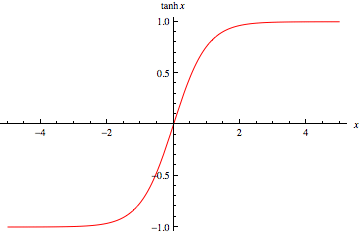

So if the sum of all outputs are larger than zero, we may conclude that prediction is 1. 
Sum of tanh's are also compatible with sigmoid function, that produces values between 0.5-1 for inputs larger than zero. Why is this important, this allows us ensemble desired number of models. 

One criticisim, sum of a lot of tanh's couldhave very strict output values, it may be hard to converge, dividing sum to number of models could be better for convergence.

Also another thing.


#### Use of dropouts for ensembling and CV

For the last layer of sub-NNs, using dropout won't harm getting ensemble results, again, sum of tanh's are zero centered again. 

To be honest, I couldn't have time to finalize my ideas. But, I thought that each sub-NN can be responsible for its own fold, by either
- training NN with full data in order to get feature extractor first layer(this will be freezed then), then randomize(re-initialize) sub-NNs ), then training each sub-NN with only one fold(keeping other layers freezed, and always using same feature extractor with same nontrainable weights. With that way I can have full NN with its sub-NNs are good at their folds.
(param.requires_grad = False, https://discuss.pytorch.org/t/how-the-pytorch-freeze-network-in-some-layers-only-the-rest-of-the-training/7088)

or 
- using fixed seed dropout on  PyTorch with manual seeding in order to mimic the procedure above. https://stackoverflow.com/questions/52730405/does-pytorch-seed-affect-dropout-layers


It should be better thought, I couldn't complete it since I started competitions very late, as I stated, this might give some of you some ideas, just wanted to share to hear comments,  critics, smilar applications.

#### Results
Not able to do full of it due to short time. LB sucks. However, this notebook is intended to give an idea for time-limited submissions, ensembling inside NNs, using activations/loss  for easier ensembling.  

In [ ]:

import importlib
import janestreet
from importlib import reload
reload(janestreet)
janestreet.make_env.__called__ = False
env = janestreet.make_env() # initialize the environment

env_iter = env.iter_test() # an iterator which loops over the test set

fillnamean_array = fillnamean[features].values

from os import listdir
from os.path import isfile, join
"""mypath = "../input/foldensembles"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
selecteds = [ ]
models = []
for model_path in selecteds : 
    models.append(return_model(load_model= False,train = False))

"""    

model = return_model(load_model= '../input/finalfinal/final_ensemble_3 (1).pth' ,train = False)